# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 571
['grytviken', 'adamstown', "la'ie", 'buala', 'auki', 'lospalos', 'alice springs', "hayma'", 'rongelap', 'sitka', 'alofi', 'ust-tsilma', 'albany', 'puerto natales', 'aral', 'tazovsky', 'nemuro', 'port-aux-francais', 'taiohae', 'atafu village', 'carutapera', 'blackmans bay', 'tapa', 'stalpeni', 'inarajan village', 'edinburgh of the seven seas', 'waitangi', 'san patricio', 'batesville', 'kisesa', 'hotan', 'laguna', 'stanley', 'beloyarskiy', 'glace bay', 'pathein', 'morehead city', 'east london', 'dampit', 'olonkinbyen', 'bikenibeu village', 'longyearbyen', 'wanning', 'lompoc', 'bel ombre', 'hawaiian paradise park', 'nantucket', 'port lincoln', 'ta`u', 'kabinda', 'timimoun', 'timbuktu', 'korla', 'hermanus', 'rutherford', 'hamilton', 'bethel', 'prince rupert', 'nuuk', 'utrik', 'iqaluit', 'isafjordur', 'anadyr', 'bilibino', 'port mathurin', 'vallenar', 'chernyshevskiy', 'ushuaia', 'cidreira', 'kodiak', 'gadzhiyevo', 'tiksi', 'kerikeri', 'mount isa', 'bafata'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
city = "adamstown"
url = "http://api.openweathermap.org/data/2.5/weather?"
city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'

response = requests.get(city_url).json()
pprint(response)


{'base': 'stations',
 'clouds': {'all': 55},
 'cod': 200,
 'coord': {'lat': -25.066, 'lon': -130.1015},
 'dt': 1711563479,
 'id': 4030723,
 'main': {'feels_like': 24.75,
          'grnd_level': 1007,
          'humidity': 61,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 24.64,
          'temp_max': 24.64,
          'temp_min': 24.64},
 'name': 'Adamstown',
 'sys': {'country': 'PN', 'sunrise': 1711550833, 'sunset': 1711593820},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 102, 'gust': 5.94, 'speed': 5.87}}


In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunrise']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | la'ie
Processing Record 4 of Set 1 | buala
Processing Record 5 of Set 1 | auki
Processing Record 6 of Set 1 | lospalos
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | hayma'
City not found. Skipping...
Processing Record 9 of Set 1 | rongelap
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | ust-tsilma
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | aral
Processing Record 16 of Set 1 | tazovsky
Processing Record 17 of Set 1 | nemuro
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | carutapera
Processing Record 22 of Set 

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,6.71,91,75,4.35,GS,1711528866
1,adamstown,-25.0660,-130.1015,24.83,60,41,5.79,PN,1711550833
2,la'ie,21.6477,-157.9253,22.98,84,59,2.68,US,1711556908
3,buala,-8.1450,159.5921,26.74,83,90,0.76,SB,1711567498
4,auki,-8.7676,160.7034,25.59,88,98,0.65,SB,1711567239


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,6.71,91,75,4.35,GS,1711528866
1,adamstown,-25.0660,-130.1015,24.83,60,41,5.79,PN,1711550833
2,la'ie,21.6477,-157.9253,22.98,84,59,2.68,US,1711556908
3,buala,-8.1450,159.5921,26.74,83,90,0.76,SB,1711567498
4,auki,-8.7676,160.7034,25.59,88,98,0.65,SB,1711567239


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

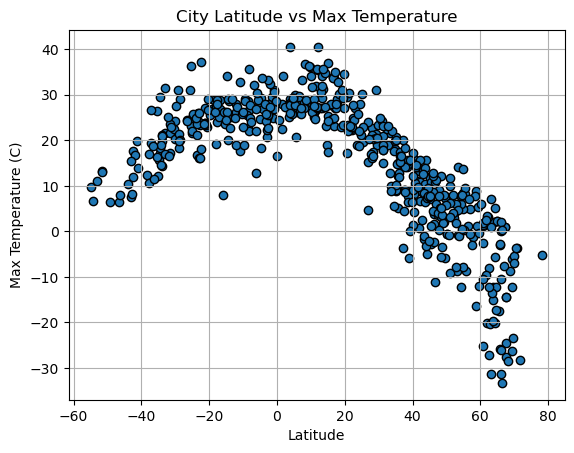

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

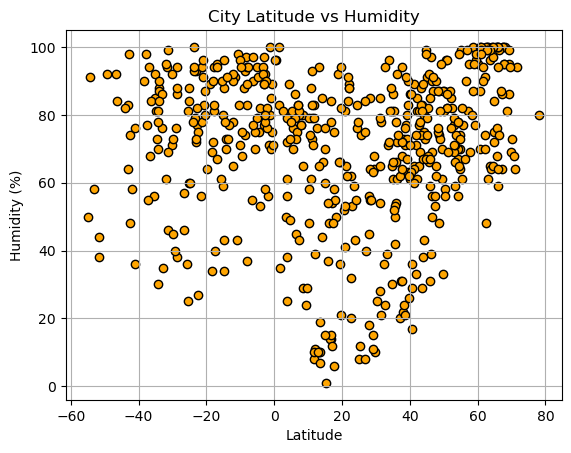

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", c = "orange")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

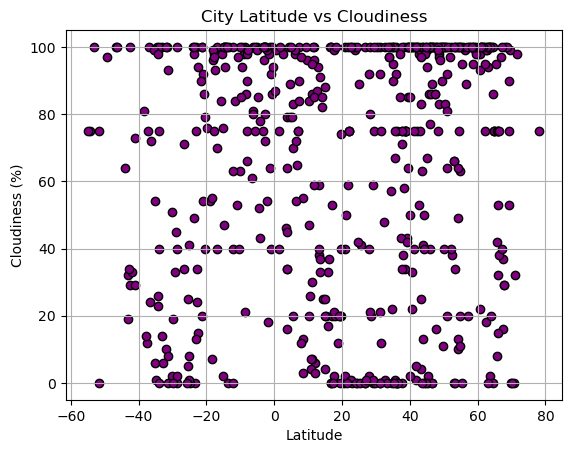

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", c = "purple")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

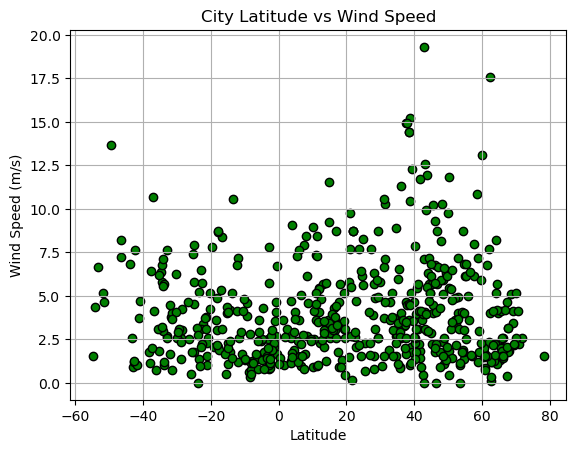

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", c = "green")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def regress(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regress_values = slope * x + intercept
    line_fit = f'y = {round(slope,2)}x + {round(intercept,2)}'
    return regress_values, line_fit, rvalue



In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,la'ie,21.6477,-157.9253,22.98,84,59,2.68,US,1711556908
7,rongelap,11.1635,166.8941,27.07,73,30,7.35,MH,1711565500
8,sitka,57.0531,-135.3300,4.94,81,20,1.54,US,1711550532
10,ust-tsilma,65.4410,52.1498,-17.44,100,95,1.34,RU,1711505085
11,albany,42.6001,-73.9662,8.86,77,98,0.45,US,1711536357


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,6.71,91,75,4.35,GS,1711528866
1,adamstown,-25.0660,-130.1015,24.83,60,41,5.79,PN,1711550833
3,buala,-8.1450,159.5921,26.74,83,90,0.76,SB,1711567498
4,auki,-8.7676,160.7034,25.59,88,98,0.65,SB,1711567239
5,lospalos,-8.5186,127.0025,22.80,93,21,0.34,TL,1711575323


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8794972885503303


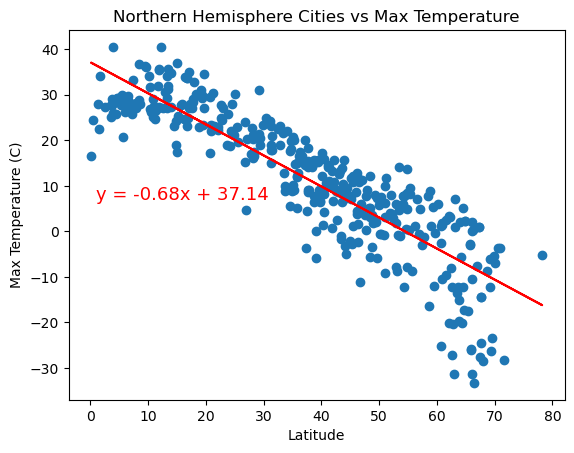

In [70]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (1,7), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere Cities vs Max Temperature")
plt.show()

The r value is: 0.6618456274998458


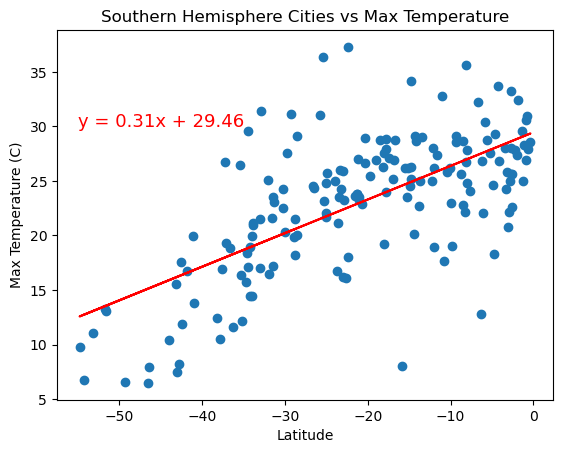

In [71]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (-55,30), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere Cities vs Max Temperature")
plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere have a noticeable relationship between latitude and max temperature. the trend is that as you get closer to the equator (latitude 0) the temperature increases. Interestingly, this relationship is slightly stronger in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.3848381429999772


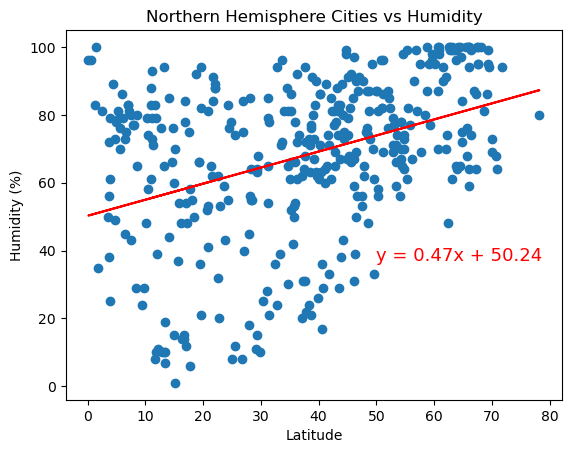

In [68]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,37), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Cities vs Humidity")
plt.show()

The r value is: 0.18400629518847936


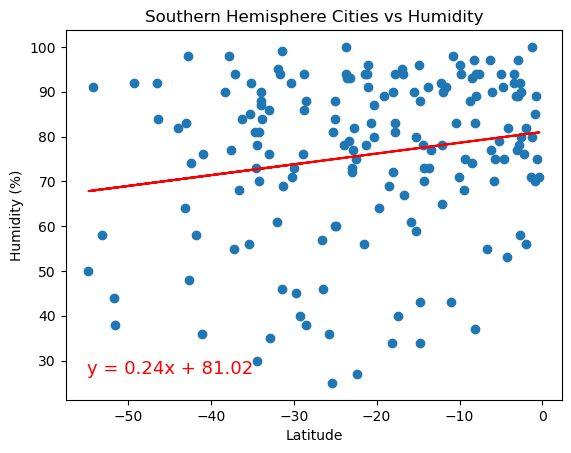

In [74]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (-55,27), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Cities vs Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.1446808135815649


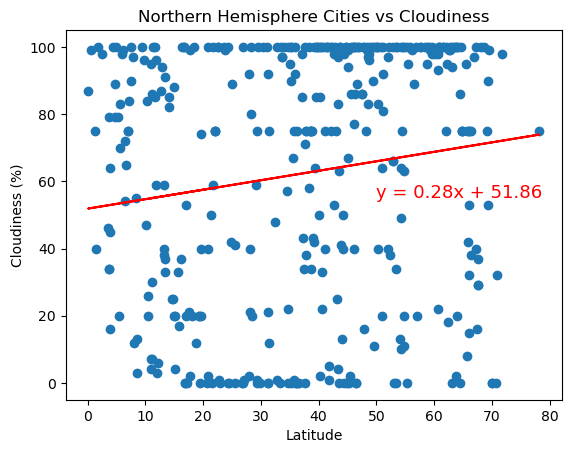

In [78]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,55), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cities vs Cloudiness")
plt.show()

The r value is: 0.3093661831662835


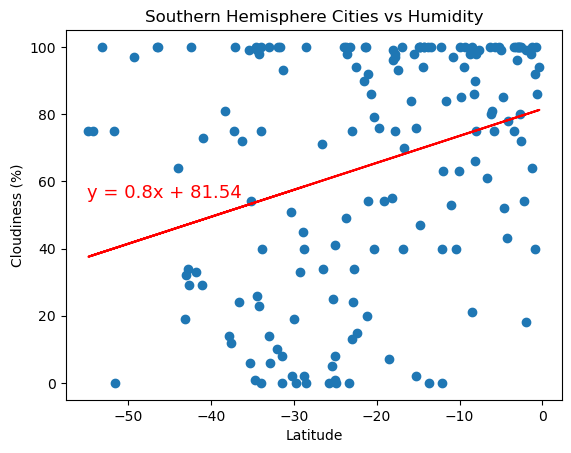

In [82]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (-55,55), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cities vs Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.012964412821770105


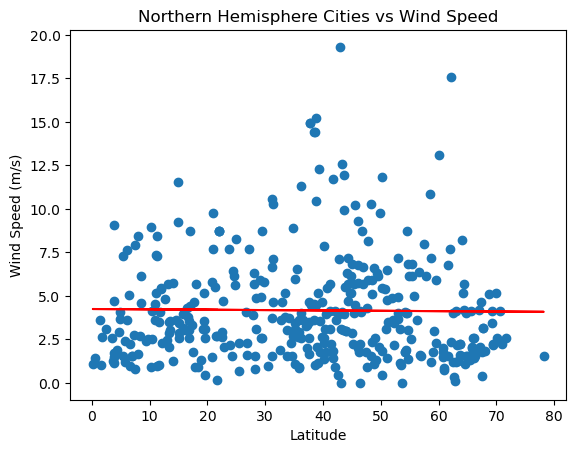

In [83]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,37), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere Cities vs Wind Speed")
plt.show()

The r value is: -0.2832221565055726


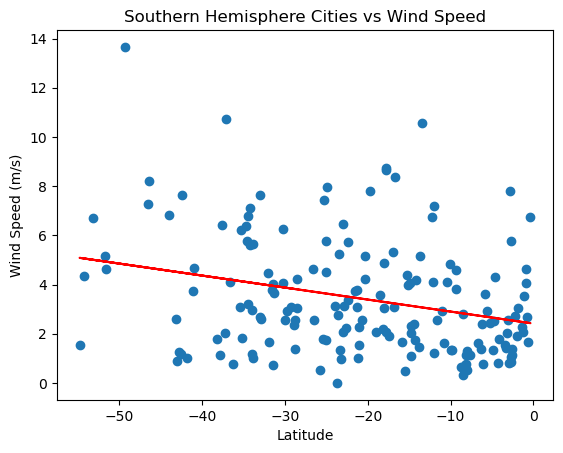

In [84]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
regress_values, line_fit, rvalue = regress(x, y)
print(f"The r value is: {rvalue}")
plt.scatter(x,y)
plt.plot(x, regress_values, color = "red")
plt.annotate(line_fit, xy = (50,37), fontsize = 13, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere Cities vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE